In [54]:
#here  im going to classify the passengers as survived or not survived, based on the available features, and thats going to help us underestand which
#factores helped people survived and make predictions in new data

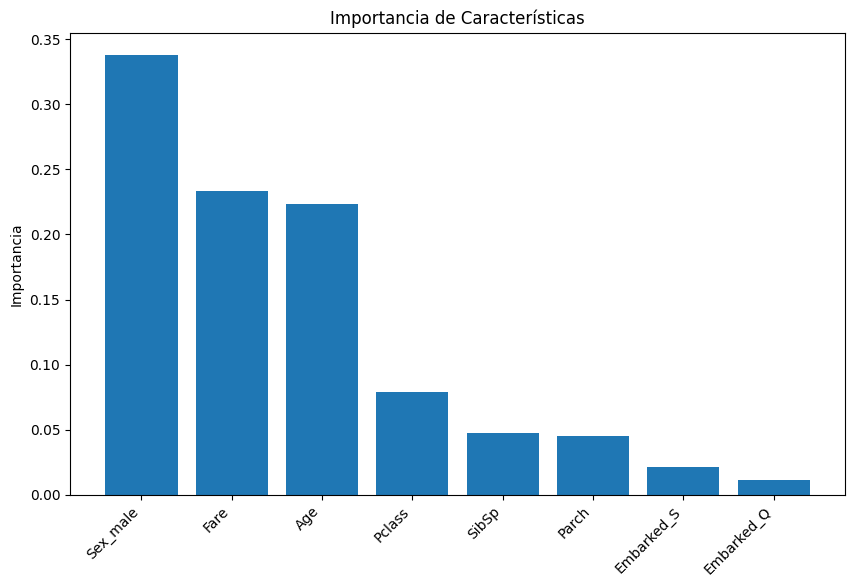

Mejor conjunto de hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Exactitud del modelo: 0.8171641791044776
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       165
           1       0.80      0.70      0.75       103

    accuracy                           0.82       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.82      0.82      0.81       268



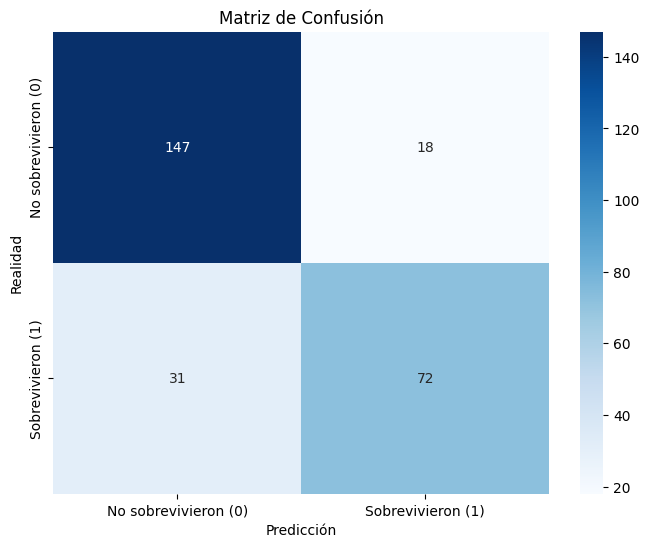

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# Cargar datos
file_path = '/mnt/data/titanic_data.csv'
data = pd.read_csv('/Users/motegui/Documents/GitHub/DBM2/titanic_data.csv')

# Asegurarse de que las variables categóricas estén codificadas correctamente
data = pd.get_dummies(data, drop_first=True)

# Definir variables independientes y dependientes
X = data.drop('Survived', axis=1)
y = data['Survived']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Calcular pesos de clases para manejo de desbalance
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

# Optimización de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42, class_weight=class_weights_dict)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_

# Predicciones y evaluación
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=["No sobrevivieron (0)", "Sobrevivieron (1)"],
    columns=["No sobrevivieron (0)", "Sobrevivieron (1)"]
)
# Importancia de características
importances = best_model.feature_importances_
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Visualizar importancia de características
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Importancia de Características')
plt.ylabel('Importancia')
plt.show()

# Resultados
print(f"Mejor conjunto de hiperparámetros: {grid_search.best_params_}")
print(f"Exactitud del modelo: {accuracy}")
print("Reporte de clasificación:\n", report)
# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()

